In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from matplotlib import pyplot as plt
%matplotlib notebook

df = pd.read_csv('ds-boot-2.csv', sep='\t')
df.head()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [28]:
features = df.columns[1:29]
labels = df.columns[29:]

<IPython.core.display.Javascript object>


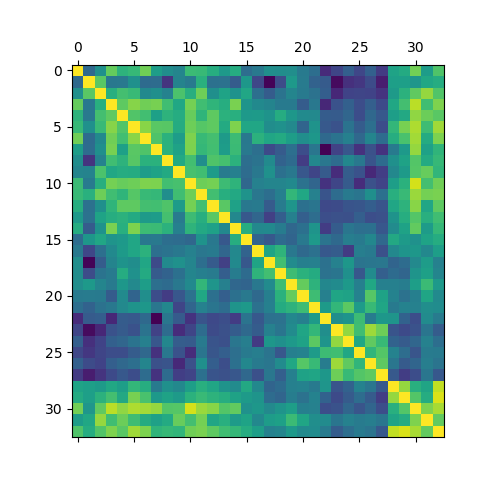

In [29]:
plt.matshow(df[list(features)+list(labels)].corr())

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels[0]], train_size=0.9)

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
reg = Ridge(alpha=0.0001, max_iter=1000)
bagger = BaggingRegressor(reg, n_estimators=1000, oob_score=True)

In [32]:
bagger.fit(X_train, y_train)

BaggingRegressor(base_estimator=Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [33]:
np.linalg.norm(bagger.oob_score - y_train)

24.964975465639856

In [55]:
def bootstrap_stats(func):
    B = 1000
    for label in labels:
        bootstrapped = func(resample(df[label], n_samples=df[label].count()*B).values.reshape((B, df[label].count())), axis=1)
        print(np.mean(bootstrapped))
bootstrap_stats(np.mean)

4.0402625
5.49730625
7.2801375
1.52536725
5.6141775
